In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [13]:
rho = 0.85
h = 0.016
m = 48
T = 1
M = 6 # cube root of number of unit cells in the L^3 volume, gives N=864 particles
L = np.cbrt((4*M**3)/rho)
sigma = 3.405 #Angstrom
epsilon = 119.8 #K

tp = h #*

In [3]:
path_r_0 = "C:/Users/corin/CLionProjects/Computational-physics/r_total_T0_rescaling.txt"
path_v_0 = "C:/Users/corin/CLionProjects/Computational-physics/v_total_T0_rescaling.txt"

path_r_2 = r"C:\Users\corin\CLionProjects\Computational-physics\r_total_T2_rescaling.txt"
path_v_2 = r"C:\Users\corin\CLionProjects\Computational-physics\v_total_T2_rescaling.txt"

path_r_1 = r"C:\Users\corin\CLionProjects\Computational-physics\r_total_T1_rescaling.txt"
path_v_1 = r"C:\Users\corin\CLionProjects\Computational-physics\v_total_T1_rescaling.txt"


r_total = np.loadtxt(path_r_0, delimiter=",")
v_total = np.loadtxt(path_v_0, delimiter=",")

r_total_2 = np.loadtxt(path_r_2, delimiter=",")
v_total_2 = np.loadtxt(path_v_2, delimiter=",")

r_total_1 = np.loadtxt(path_r_1, delimiter=",")
v_total_1 = np.loadtxt(path_v_1, delimiter=",")

r_total_2.shape

(1295127, 3)

In [4]:
num_timesteps = 1498

r_total_cut = r_total[:864*num_timesteps - r_total.shape[0], :]
v_total_cut = v_total[:864*num_timesteps - v_total.shape[0], :]
r_total_reshaped = r_total_cut.reshape((num_timesteps, 864, 3))
v_total_reshaped = v_total_cut.reshape((num_timesteps, 864, 3))

r_total_2_cut = r_total_2[:864*num_timesteps - r_total_2.shape[0], :]
v_total_2_cut = v_total_2[:864*num_timesteps - v_total_2.shape[0], :]
r_total_2_reshaped = r_total_2_cut.reshape((num_timesteps, 864, 3))
v_total_2_reshaped = v_total_2_cut.reshape((num_timesteps, 864, 3))

r_total_1_cut = r_total_1[:864*num_timesteps - r_total_1.shape[0], :]
v_total_1_cut = v_total_1[:864*num_timesteps - v_total_1.shape[0], :]
r_total_1_reshaped = r_total_1_cut.reshape((num_timesteps, 864, 3))
v_total_1_reshaped = v_total_1_cut.reshape((num_timesteps, 864, 3))

In [5]:
def r_ij(r_i, r_j):
    return r_i[0]-r_j[0]

"""
list_rij_T1 = []
for t in tqdm(range(num_timesteps)):
    if t%5 == 0:
        for r_a in r_total_1_reshaped[t]:
            for r_b in r_total_1_reshaped[t]:
                list_rij_T1.append(r_ij(r_a,r_b))
"""

'\nlist_rij_T1 = []\nfor t in tqdm(range(num_timesteps)):\n    if t%5 == 0:\n        for r_a in r_total_1_reshaped[t]:\n            for r_b in r_total_1_reshaped[t]:\n                list_rij_T1.append(r_ij(r_a,r_b))\n'

In [6]:
#np.savetxt("rij_T1_x.txt", np.array(list_rij_T1), delimiter=", ")

In [7]:
"""
list_rij_T2 = []
for t in tqdm(range(num_timesteps)):
    if t%5 ==0:
         for r_a in r_total_2_reshaped[t]:
            for r_b in r_total_2_reshaped[t]:
                list_rij_T2.append(r_ij(r_a,r_b))
#np.savetxt("rij_T2_x.txt", np.array(list_rij_T2), delimiter=", ")
"""

'\nlist_rij_T2 = []\nfor t in tqdm(range(num_timesteps)):\n    if t%5 ==0:\n         for r_a in r_total_2_reshaped[t]:\n            for r_b in r_total_2_reshaped[t]:\n                list_rij_T2.append(r_ij(r_a,r_b))\n#np.savetxt("rij_T2_x.txt", np.array(list_rij_T2), delimiter=", ")\n'

In [8]:
list_rij_T0 = []
"""
for t in tqdm(range(num_timesteps)):
    for r_a in r_total_reshaped[t]:
            for r_b in r_total_reshaped[t]:
                list_rij_T0.append(r_ij(r_a,r_b))
#np.savetxt("rij_T0_x.txt", np.array(list_rij_T0), delimiter=", ")
"""

'\nfor t in tqdm(range(num_timesteps)):\n    for r_a in r_total_reshaped[t]:\n            for r_b in r_total_reshaped[t]:\n                list_rij_T0.append(r_ij(r_a,r_b))\n#np.savetxt("rij_T0_x.txt", np.array(list_rij_T0), delimiter=", ")\n'

In [9]:
#list_rij_T0 = np.loadtxt("rij_T0_x.txt")
#list_rij_T1 = np.loadtxt("rij_T1_x.txt")
#list_rij_T2 = np.loadtxt("rij_T2_x.txt")

In [10]:
"""
bin_width = 0.05
min_r = 0.0
max_r = 2.5

num_bins = 50

fig, ax = plt.subplots()
n_1, bins_1, patches_1 = ax.hist(list_rij_T1, num_bins, label="$T^{*} = 1$")
n_2, bins_2, patches_2 = ax.hist(list_rij_T2, num_bins, label="$T^{*} = 2$")
#n_0, bins_0, patches_0 = ax.hist(list_rij_T0, num_bins, label="$T^{*} = 0$")

ax.set_xlabel('Pairwise distances')
ax.set_ylabel('Frequency')
fig.tight_layout()
plt.legend()
plt.title("Histogram of the pairwise distances in x direction (accumulated over time)")
plt.show()
"""

'\nbin_width = 0.05\nmin_r = 0.0\nmax_r = 2.5\n\nnum_bins = 50\n\nfig, ax = plt.subplots()\nn_1, bins_1, patches_1 = ax.hist(list_rij_T1, num_bins, label="$T^{*} = 1$")\nn_2, bins_2, patches_2 = ax.hist(list_rij_T2, num_bins, label="$T^{*} = 2$")\n#n_0, bins_0, patches_0 = ax.hist(list_rij_T0, num_bins, label="$T^{*} = 0$")\n\nax.set_xlabel(\'Pairwise distances\')\nax.set_ylabel(\'Frequency\')\nfig.tight_layout()\nplt.legend()\nplt.title("Histogram of the pairwise distances in x direction (accumulated over time)")\nplt.show()\n'

In [11]:
#np.savetxt("rij_T2_x.txt", np.array(list_rij_T2), delimiter=", ")
#np.savetxt("rij_T0_x.txt", np.array(list_rij_T0), delimiter=", ")
#np.savetxt("rij_T2_x.txt", np.array(list_rij_T2), delimiter=", ")

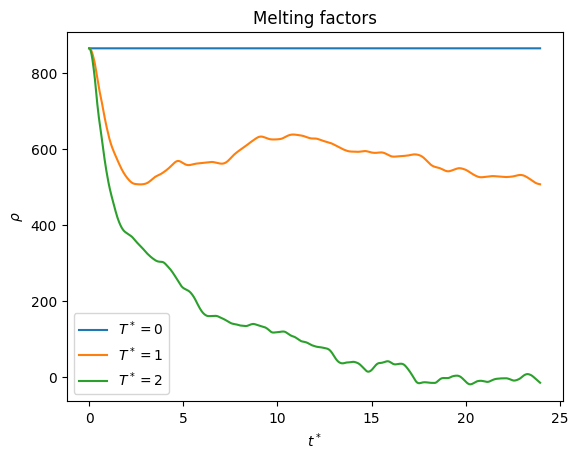

In [14]:
def melting_factor(x):
    """
    :param x: 1D array of shape (num_particles,), positions of all particles' x-positions at a certain time step
    :return: float, melting factor for the configuration
    """
    a = L/M
    k = 4*np.pi/a
    return np.sum([np.cos(k*i) for i in x])

melting_factors_0 = [melting_factor(r_total_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]
melting_factors_1 = [melting_factor(r_total_1_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]
melting_factors_2 = [melting_factor(r_total_2_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]

plt.plot(np.arange(num_timesteps)*tp, melting_factors_0, label="$T^* = 0$")
plt.plot(np.arange(num_timesteps)*tp, melting_factors_1, label="$T^* = 1$")
plt.plot(np.arange(num_timesteps)*tp, melting_factors_2, label="$T^* = 2$")

plt.title("Melting factors")
plt.xlabel("$t^*$")
plt.ylabel(r"$\rho$")
plt.legend()

In [16]:
r_total_2_reshaped[-1].shape

(864, 3)

In [17]:
def mean_squared_difference(list_r, list_r_0):
    list_diff = list_r - list_r_0
    list_total_diff = [[delta_r[dim]**2 for dim in range(3)] for delta_r in list_diff]
    return np.mean(list_total_diff)

print("T=2: ", mean_squared_difference(r_total_2_reshaped[-1], r_total_2_reshaped[0]))
print("T=1: ", mean_squared_difference(r_total_1_reshaped[-1], r_total_1_reshaped[0]))
print("T=2: ", mean_squared_difference(r_total_reshaped[-1], r_total_reshaped[0]))

T=2:  0.4586044642152607
T=1:  0.05073724644267092
T=2:  0.0
